In [1]:
# Step 2A: Import necessary libraries
import pandas as pd

# Step 2B: Load the dataset
df = pd.read_csv("Tweets.csv")  # Make sure the file is in the same folder as your notebook

# Step 2C: Show the first 5 rows
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
# Step 3A: Check the column names
print("Column names:")
print(df.columns)

# Step 3B: Check the unique sentiment values
print("\nUnique sentiments:")
print(df['airline_sentiment'].unique())

# Step 3C: See how many tweets for each sentiment
print("\nSentiment counts:")
print(df['airline_sentiment'].value_counts())

Column names:
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Unique sentiments:
['neutral' 'positive' 'negative']

Sentiment counts:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [3]:
import re
import string

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@[\w]*', '', text)  # Remove mentions
    text = re.sub(r'\#[\w]*', '', text)  # Remove hashtags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply this function to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

# Show few cleaned examples
df[['text', 'clean_text']].head()

,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the clean text into feature vectors
X = vectorizer.fit_transform(df['clean_text'])

# Target column (labels)
y = df['airline_sentiment']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score

# Predict sentiments on test data
y_pred = model.predict(X_test)

# Print accuracy score
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.8060109289617486


Classification Report:

              precision    recall  f1-score   support

    negative       0.83      0.93      0.88      1889
     neutral       0.68      0.54      0.60       580
    positive       0.82      0.61      0.70       459

    accuracy                           0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928



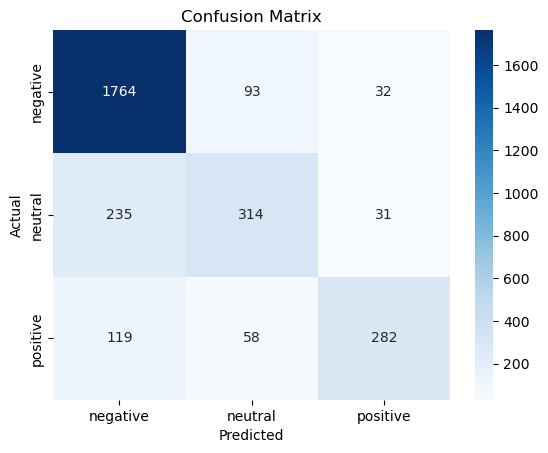

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()